---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data = pd.read_csv(r'C:\Users\home\WorkSpace\AB_NYC_2019.csv')

### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
data.shape

(48895, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
data = data[pd.notnull(data['host_name'])]

In [9]:
data = data[pd.notnull(data['name'])]

In [10]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [11]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [12]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373229,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.680328,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
data.quantile(0.05)   #5%

id                                1.221895e+06
host_id                           8.155916e+05
latitude                          4.064610e+01
longitude                        -7.400388e+01
price                             4.000000e+01
minimum_nights                    1.000000e+00
number_of_reviews                 0.000000e+00
reviews_per_month                 4.000000e-02
calculated_host_listings_count    1.000000e+00
availability_365                  0.000000e+00
Name: 0.05, dtype: float64

In [14]:
data.quantile(0.25)   #25%

id                                9.475980e+06
host_id                           7.818669e+06
latitude                          4.069009e+01
longitude                        -7.398307e+01
price                             6.900000e+01
minimum_nights                    1.000000e+00
number_of_reviews                 1.000000e+00
reviews_per_month                 1.900000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  0.000000e+00
Name: 0.25, dtype: float64

In [15]:
data.quantile(0.50)   #50%

id                                1.969114e+07
host_id                           3.079133e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
reviews_per_month                 7.200000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
Name: 0.5, dtype: float64

In [16]:
data.quantile(0.75)   #75%

id                                2.915765e+07
host_id                           1.074344e+08
latitude                          4.076311e+01
longitude                        -7.393628e+01
price                             1.750000e+02
minimum_nights                    5.000000e+00
number_of_reviews                 2.400000e+01
reviews_per_month                 2.020000e+00
calculated_host_listings_count    2.000000e+00
availability_365                  2.270000e+02
Name: 0.75, dtype: float64

In [17]:
data.quantile(0.95)   #95%

id                                3.525969e+07
host_id                           2.417852e+08
latitude                          4.082561e+01
longitude                        -7.386575e+01
price                             3.550000e+02
minimum_nights                    3.000000e+01
number_of_reviews                 1.140000e+02
reviews_per_month                 4.640000e+00
calculated_host_listings_count    1.500000e+01
availability_365                  3.590000e+02
Name: 0.95, dtype: float64

### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

In [19]:
del_high5per = data[data['price'] <= data['price'].quantile(0.95)]

In [20]:
del_high5per.shape

(46418, 16)

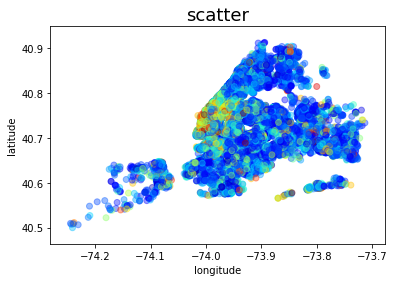

In [21]:
Scatter = plt.scatter(x = del_high5per['longitude'], y = del_high5per['latitude'] ,
                      c = del_high5per['price'] ,cmap=plt.get_cmap('jet'), alpha=0.4)
plt.title('scatter',fontsize = 18)
plt.xlabel('longitude',fontsize = 10)
plt.ylabel('latitude',fontsize = 10)
plt.show()

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

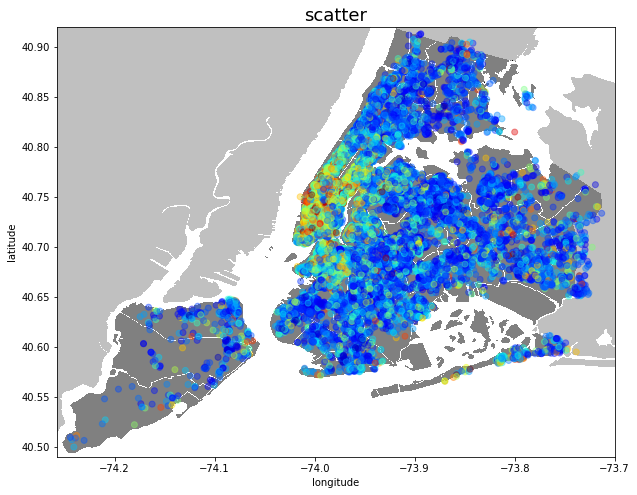

In [22]:
newyorkcity = plt.imread('newyorkcity.png')
plt.figure(figsize=(10,8))
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()

Scatter = plt.scatter(x = del_high5per['longitude'], y = del_high5per['latitude'] ,
                      c = del_high5per['price'] ,cmap=plt.get_cmap('jet'), alpha=0.4)

plt.title('scatter',fontsize = 18)
plt.xlabel('longitude',fontsize = 10)
plt.ylabel('latitude',fontsize = 10)
plt.show()

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [23]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import re
analysis_data = data

# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)
# 4번 예제
# pd.read_sql('select * from data', conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [24]:
data.shape

(48858, 16)

In [25]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
newname_data = data[data.name.str.contains('[a-zA-Z0-9]|[.]|[,]|[-]|[#]|[\s]', regex = True, na = False)]

In [27]:
newname_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [28]:
all_room_type = newname_data[['room_type', 'name','host_id','price']]

In [29]:
grouped_all_room_type = all_room_type.groupby(by=['room_type'], as_index=False, sort = False, ).max()

In [30]:
grouped_all_room_type.head()

,room_type,name,host_id,price
0,Private room,"ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡",274321313,10000
1,Entire home/apt,️CENTRALLY LOCATED️- Great for Families + Groups,274311461,10000
2,Shared room,뉴욕의 꿈꾸는 집 (for women),272477673,1800


In [31]:
luxury_all_room_type = all_room_type.groupby('room_type').get_group('Entire home/apt')
luxury_Entire_home_apt_type = luxury_all_room_type.sort_values(by=['price'], axis=0, ascending=False)
luxury_Entire_home_apt_type

,room_type,name,host_id,price
29238,Entire home/apt,1-BR Lincoln Center,72390391,10000
17692,Entire home/apt,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
40433,Entire home/apt,2br - The Heart of NYC: Manhattans Lower East ...,4382127,9999
6530,Entire home/apt,Spanish Harlem Apt,1235070,9999
30268,Entire home/apt,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,8500
...,...,...,...,...
32810,Entire home/apt,Gigantic Sunny Room in Park Slope-Private Back...,167570251,10
27972,Entire home/apt,Spacious 2-bedroom Apt in Heart of Greenpoint,11967922,10
2860,Entire home/apt,Large furnished 2 bedrooms- - 30 days Minimum,2196224,10
25778,Entire home/apt,Modern apartment in the heart of Williamsburg,10132166,0


In [32]:
luxury_all_room_type = all_room_type.groupby('room_type').get_group('Private room')
luxury_Private_room_type = luxury_all_room_type.sort_values(by=['price'], axis=0, ascending=False)
luxury_Private_room_type

,room_type,name,host_id,price
9151,Private room,Furnished room in Astoria apartment,20582832,10000
12342,Private room,"Quiet, Clean, Lit @ LES & Chinatown",3906464,9999
45666,Private room,Gem of east Flatbush,262534951,7500
37194,Private room,Apartment New York \nHell’s Kitchens,35303743,6500
4345,Private room,NearWilliamsburg bridge 11211 BK,14908606,5000
...,...,...,...,...
25634,Private room,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,0
25795,Private room,Contemporary bedroom in brownstone with nice view,86327101,0
25796,Private room,Cozy yet spacious private brownstone bedroom,86327101,0
23161,Private room,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,0


In [33]:
luxury_all_room_type = all_room_type.groupby('room_type').get_group('Shared room')
luxury_Shared_room_type = luxury_all_room_type.sort_values(by=['price'], axis=0, ascending=False)
luxury_Shared_room_type

,room_type,name,host_id,price
14380,Shared room,Mins away to Manhattan Suite Residence,24146326,1800
30080,Shared room,Artist apartment in LIC,51260506,1250
23545,Shared room,1BR/1BA in 2BR/2BA Flushing,356490,1000
3700,Shared room,An Accomodating Apartment on Wall,11385753,1000
25422,Shared room,New York's Hidden Secret for luxury living,131826530,800
...,...,...,...,...
35005,Shared room,sofa Bed And Breakfast,205706382,11
24100,Shared room,"Girls only, cozy room one block from Times Square",47336995,10
21700,Shared room,Couch in Harlem Harvey Refugees only,33511962,10
26866,Shared room,Best Coliving space ever! Shared room.,101970559,0


중복된값은 gruopby의 파라미터들 전부 적용해봤는데 못했습니다.

### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

In [34]:
all_room_type_500 = all_room_type.sort_values(by=['price'], axis=0, ascending=False)
all_room_type_500

,room_type,name,host_id,price
9151,Private room,Furnished room in Astoria apartment,20582832,10000
29238,Entire home/apt,1-BR Lincoln Center,72390391,10000
17692,Entire home/apt,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
40433,Entire home/apt,2br - The Heart of NYC: Manhattans Lower East ...,4382127,9999
12342,Private room,"Quiet, Clean, Lit @ LES & Chinatown",3906464,9999
...,...,...,...,...
25433,Private room,★Hostel Style Room | Ideal Traveling Buddies★,131697576,0
26259,Entire home/apt,the best you can find,13709292,0
25778,Entire home/apt,Modern apartment in the heart of Williamsburg,10132166,0
25753,Private room,"Sunny, Quiet Room in Greenpoint",1641537,0


In [35]:
all_room_type_500.reset_index(inplace = True, drop = True)
all_room_type_500

,room_type,name,host_id,price
0,Private room,Furnished room in Astoria apartment,20582832,10000
1,Entire home/apt,1-BR Lincoln Center,72390391,10000
2,Entire home/apt,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
3,Entire home/apt,2br - The Heart of NYC: Manhattans Lower East ...,4382127,9999
4,Private room,"Quiet, Clean, Lit @ LES & Chinatown",3906464,9999
...,...,...,...,...
48803,Private room,★Hostel Style Room | Ideal Traveling Buddies★,131697576,0
48804,Entire home/apt,the best you can find,13709292,0
48805,Entire home/apt,Modern apartment in the heart of Williamsburg,10132166,0
48806,Private room,"Sunny, Quiet Room in Greenpoint",1641537,0


In [36]:
all_room_type_500=all_room_type_500.loc[:499]

In [37]:
all_room_type_500

,room_type,name,host_id,price
0,Private room,Furnished room in Astoria apartment,20582832,10000
1,Entire home/apt,1-BR Lincoln Center,72390391,10000
2,Entire home/apt,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,10000
3,Entire home/apt,2br - The Heart of NYC: Manhattans Lower East ...,4382127,9999
4,Private room,"Quiet, Clean, Lit @ LES & Chinatown",3906464,9999
...,...,...,...,...
495,Entire home/apt,Modern large 2 bedroom steps from Central Park!,45752004,795
496,Entire home/apt,Surrealist Luxury Loft,11949316,795
497,Entire home/apt,Luxury 2BR/2BATH TownhousUpper East Side Manha...,89196907,795
498,Private room,NYC Luxury | Penthouse Suite + Private Outdoor...,239660813,794


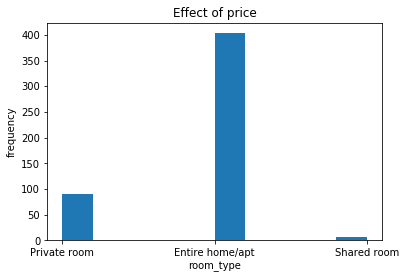

In [38]:
plt.hist(x = all_room_type_500['room_type'], bins =10)
plt.xlabel('room_type')
plt.ylabel('frequency')
plt.title('Effect of price')
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [39]:
# 4번 문제
import sqlite3
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)
# 4번 예제
pd.read_sql('select * from data', conn)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,None,NaN,2,9
48854,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,None,NaN,2,36
48855,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,None,NaN,1,27
48856,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,None,NaN,6,2


In [40]:
newname_data['host_id'].value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [41]:
_1st = newname_data[newname_data["host_id"] == 219517861]
_2st = newname_data[newname_data["host_id"] == 107434423]
_3st = newname_data[newname_data["host_id"] == 30283594]
_4st = newname_data[newname_data["host_id"] == 137358866]
_5st = newname_data[newname_data["host_id"] == 12243051]
_6st = newname_data[newname_data["host_id"] == 16098958]
_7st = newname_data[newname_data["host_id"] == 61391963]
_8st = newname_data[newname_data["host_id"] == 22541573]
_9st = newname_data[newname_data["host_id"] == 200380610]
_10st = newname_data[newname_data["host_id"] == 7503643]

In [42]:
VIP = pd.concat([_1st, _2st, _3st, _4st, _5st, _6st, _7st, _8st, _9st, _10st])

In [43]:
VIP

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,7092505,Beautiful duplex studio with 2 queen beds,7503643,Vida,Brooklyn,Greenpoint,40.72568,-73.94142,Entire home/apt,129,30,4,2019-06-15,0.08,52,357
10073,7728860,Flex 2br+sofa bed+kitchen,7503643,Vida,Brooklyn,Greenpoint,40.72674,-73.94004,Entire home/apt,159,30,2,2018-12-22,0.05,52,0
11596,9025565,Flex 2BR Loft ( 1br +Sleep Loft +Sofa Bed )!,7503643,Vida,Brooklyn,Greenpoint,40.72614,-73.94007,Entire home/apt,159,30,6,2019-06-04,0.15,52,343
22652,18329982,Gorgeous Studio in Greenpoint with City Views,7503643,Vida,Brooklyn,Greenpoint,40.72749,-73.94060,Entire home/apt,129,30,0,NaN,NaN,52,5


In [44]:
VIP = VIP[['host_id','price']]

In [45]:
VIP

,host_id,price
38293,219517861,302
38294,219517861,229
38588,219517861,232
39769,219517861,262
39770,219517861,255
...,...,...
9282,7503643,129
10073,7503643,159
11596,7503643,159
22652,7503643,129


In [46]:
VIP = VIP.groupby('host_id', sort = False).mean()
VIP

,price
host_id,
219517861,253.195719
107434423,303.150862
30283594,277.528926
137358866,43.825243
12243051,213.031250
16098958,208.958333
61391963,146.241758
22541573,215.436782
200380610,290.230769


문제 이해를 잘못해서 파이썬으로 풀어보았습니다. 밑에부분이 SQL을 이용해 풀은 부분입니다.

In [47]:
pd.read_sql('select host_id , price from data order by host_id', conn)

,host_id,price
0,2438,95
1,2571,182
2,2787,149
3,2787,99
4,2787,79
...,...,...
48853,274273284,140
48854,274298453,54
48855,274307600,190
48856,274311461,200


In [48]:
pd.read_sql('select host_id , price , count(host_id), avg(price) from data group by host_id order by count(host_id)desc limit 10', conn)

,host_id,price,count(host_id),avg(price)
0,219517861,302,327,253.195719
1,107434423,308,232,303.150862
2,30283594,169,121,277.528926
3,137358866,56,103,43.825243
4,16098958,175,96,208.958333
5,12243051,212,96,213.031250
6,61391963,133,91,146.241758
7,22541573,163,87,215.436782
8,200380610,185,65,290.230769
9,7503643,129,52,149.192308


In [49]:
pd.read_sql('select host_id, avg(price) from data group by host_id order by count(host_id)desc limit 10', conn)

,host_id,avg(price)
0,219517861,253.195719
1,107434423,303.150862
2,30283594,277.528926
3,137358866,43.825243
4,16098958,208.958333
5,12243051,213.031250
6,61391963,146.241758
7,22541573,215.436782
8,200380610,290.230769
9,7503643,149.192308
